In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline 
rcParams['figure.figsize']=20,10
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('final_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9211 entries, 0 to 9210
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DATE                 9211 non-null   object
 1   ME_ID                9211 non-null   object
 2   DISEASE_ID           9211 non-null   object
 3   ORDER_QUANTITY       9211 non-null   object
 4   ORDER_FREE_QUANTITY  9211 non-null   int64 
 5   SOLD_QUANTITY        9211 non-null   object
 6   SOLD_FREE            9210 non-null   object
 7   MEDICINE_NAME        9211 non-null   object
 8   DISEASE_NAME         9211 non-null   object
 9   CITY                 9211 non-null   object
dtypes: int64(1), object(9)
memory usage: 719.7+ KB


In [4]:
# check missing value
print(df.isnull().sum())

DATE                   0
ME_ID                  0
DISEASE_ID             0
ORDER_QUANTITY         0
ORDER_FREE_QUANTITY    0
SOLD_QUANTITY          0
SOLD_FREE              1
MEDICINE_NAME          0
DISEASE_NAME           0
CITY                   0
dtype: int64


In [5]:
df[df.SOLD_FREE.isnull()].index.to_list()

[0]

In [6]:
# check the row when SOLD_FREE is NaN. looks like a valuable row to keep (ORDER_QUANTITY = 1076) 
df.iloc[270,:]

DATE                         31-12-2019
ME_ID                            AM2020
DISEASE_ID                       BL2020
ORDER_QUANTITY                        0
ORDER_FREE_QUANTITY                   0
SOLD_QUANTITY                       110
SOLD_FREE                            10
MEDICINE_NAME          AMLOKIND AT -TAB
DISEASE_NAME             BLOOD PRESSURE
CITY                           KANDUKUR
Name: 270, dtype: object

In [7]:
# SOLD_FREE is usually a percentage of SOLD_QUANTITY. So filling this with 0 should be fine.
# fill the NaN in SOLD_FREE with '0' because it was a string
df.SOLD_FREE = df.SOLD_FREE.fillna('0')

In [8]:
print(df.isnull().sum())

DATE                   0
ME_ID                  0
DISEASE_ID             0
ORDER_QUANTITY         0
ORDER_FREE_QUANTITY    0
SOLD_QUANTITY          0
SOLD_FREE              0
MEDICINE_NAME          0
DISEASE_NAME           0
CITY                   0
dtype: int64


In [9]:
# convert the following columns to numeric
df['ORDER_QUANTITY'] = pd.to_numeric(df.ORDER_QUANTITY.apply(lambda x: x.replace(',','').replace(' ','')))
df['SOLD_QUANTITY'] = pd.to_numeric(df.SOLD_QUANTITY.apply(lambda x: x.replace(',','').replace(' ','')))
df['SOLD_FREE'] = pd.to_numeric(df.SOLD_FREE.apply(lambda x: x.replace(',','').replace(' ','')))

In [10]:
# convert Date
df['DATE'] = pd.to_datetime(df.DATE, dayfirst = True)
# Add columns for year, month, day, weekday
df['year'] = df.DATE.apply(lambda x:x.year).astype(str)
df['month'] = df.DATE.apply(lambda x:x.month).astype(str)
df['day'] = df.DATE.apply(lambda x:x.day).astype(str)
df['weekday'] = df.DATE.apply(lambda x:x.weekday()).astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9211 entries, 0 to 9210
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE                 9211 non-null   datetime64[ns]
 1   ME_ID                9211 non-null   object        
 2   DISEASE_ID           9211 non-null   object        
 3   ORDER_QUANTITY       9211 non-null   float64       
 4   ORDER_FREE_QUANTITY  9211 non-null   int64         
 5   SOLD_QUANTITY        9211 non-null   float64       
 6   SOLD_FREE            9211 non-null   float64       
 7   MEDICINE_NAME        9211 non-null   object        
 8   DISEASE_NAME         9211 non-null   object        
 9   CITY                 9211 non-null   object        
 10  year                 9211 non-null   object        
 11  month                9211 non-null   object        
 12  day                  9211 non-null   object        
 13  weekday              9211 non-nul

In [12]:
df.head(10)

,DATE,ME_ID,DISEASE_ID,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE,MEDICINE_NAME,DISEASE_NAME,CITY,year,month,day,weekday
0,2019-04-01,AM2020,BL2020,1076.0,0,0.0,0.0,AMLOKIND AT -TAB,BLOOD PRESSURE,VIJAYAWADA,2019,4,1,0
1,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1
2,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2019,5,21,1
3,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,ONGOLE,2019,5,21,1
4,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1
5,2019-05-21,AM2020,BL2020,0.0,0,22.0,2.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1
6,2019-05-22,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,22,2
7,2019-05-22,AM2020,BL2020,0.0,0,220.0,20.0,AMLOKIND AT -TAB,BLOOD PRESSURE,ONGOLE,2019,5,22,2
8,2019-05-23,AM2020,BL2020,0.0,0,55.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,ONGOLE,2019,5,23,3
9,2019-05-24,AM2020,BL2020,0.0,0,22.0,2.0,AMLOKIND AT -TAB,BLOOD PRESSURE,PAMUR,2019,5,24,4


In [13]:
df.describe()

,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE
count,9211.000000,9211.000000,9211.000000,9211.000000
mean,43.279883,1.622191,38.959071,2.295842
std,326.357535,20.184430,84.196034,12.493476
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,0.000000
50%,0.000000,0.000000,11.000000,0.000000
75%,0.000000,0.000000,40.000000,1.000000
max,10840.000000,950.000000,2400.000000,1000.000000


In [14]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (239, 14)


In [15]:
duplicate_rows_df.head(10)

,DATE,ME_ID,DISEASE_ID,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE,MEDICINE_NAME,DISEASE_NAME,CITY,year,month,day,weekday
4,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1
31,2019-06-04,AM2020,BL2020,0.0,0,11.0,1.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2019,6,4,1
83,2019-07-20,AM2020,BL2020,0.0,0,11.0,1.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,7,20,5
163,2019-10-11,AM2020,BL2020,0.0,0,33.0,3.0,AMLOKIND AT -TAB,BLOOD PRESSURE,CHIMAKURTHY,2019,10,11,4
169,2019-10-14,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,PODILI,2019,10,14,0
170,2019-10-14,AM2020,BL2020,0.0,0,550.0,50.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,10,14,0
183,2019-10-18,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2019,10,18,4
251,2019-12-14,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,VIJAYAWADA,2019,12,14,5
272,2020-01-01,AM2020,BL2020,0.0,0,55.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2020,1,1,2
273,2020-01-01,AM2020,BL2020,0.0,0,55.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2020,1,1,2


In [16]:
df = df.drop_duplicates()

In [17]:
df.count()

DATE                   8972
ME_ID                  8972
DISEASE_ID             8972
ORDER_QUANTITY         8972
ORDER_FREE_QUANTITY    8972
SOLD_QUANTITY          8972
SOLD_FREE              8972
MEDICINE_NAME          8972
DISEASE_NAME           8972
CITY                   8972
year                   8972
month                  8972
day                    8972
weekday                8972
dtype: int64

In [18]:
df.describe()

,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE
count,8972.000000,8972.000000,8972.000000,8972.000000
mean,44.432791,1.665403,38.998105,2.303165
std,330.598795,20.449774,84.821373,12.635726
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,0.000000
50%,0.000000,0.000000,11.000000,0.000000
75%,0.000000,0.000000,40.000000,1.000000
max,10840.000000,950.000000,2400.000000,1000.000000


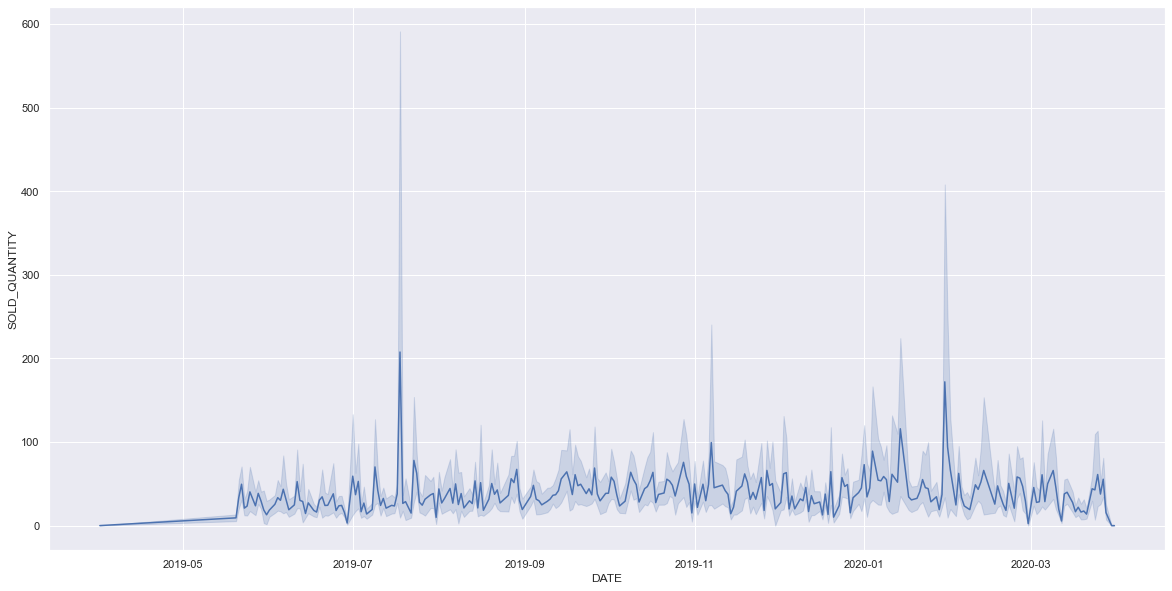

In [19]:
sns.lineplot(x="DATE", y="SOLD_QUANTITY", data=df)

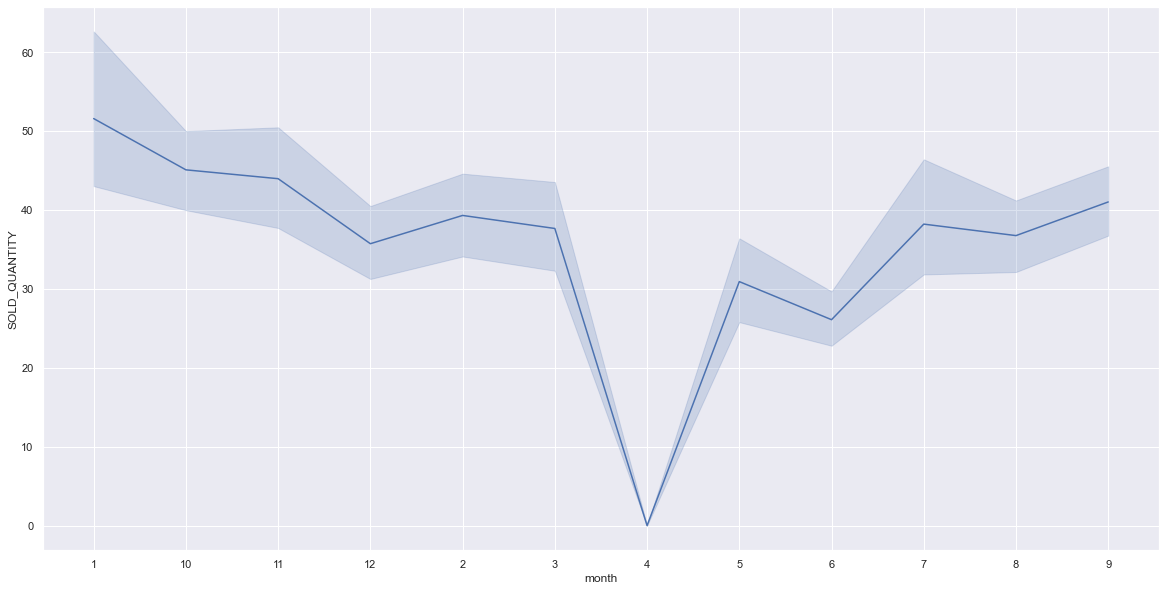

In [20]:
sns.lineplot(x="month", y="SOLD_QUANTITY", data=df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


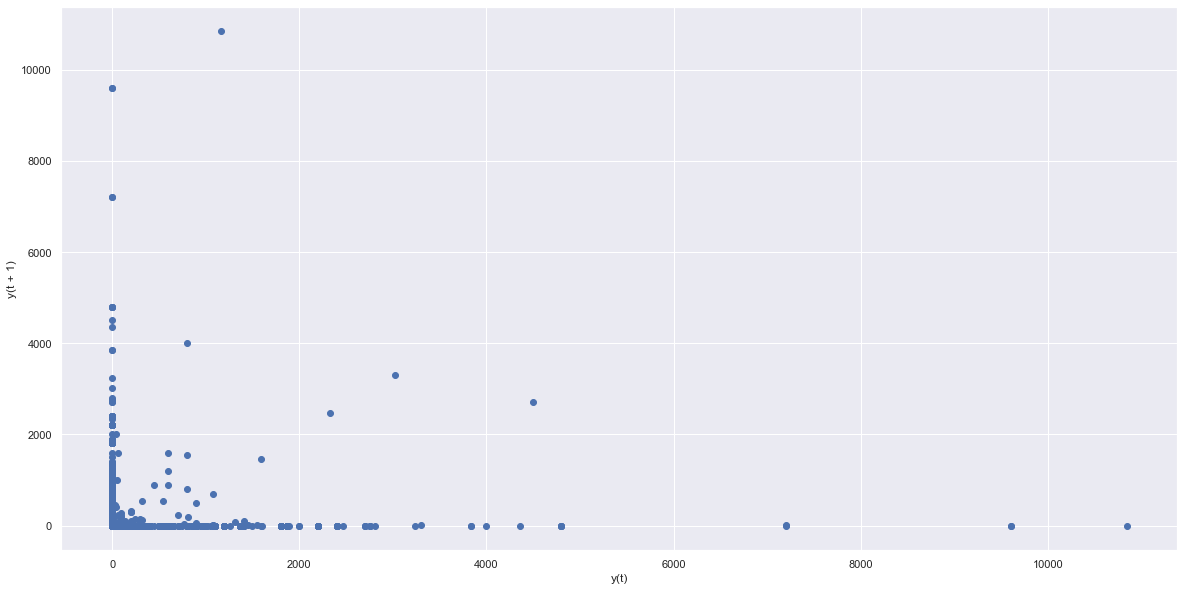

In [21]:
pd.plotting.lag_plot(df['ORDER_QUANTITY'], lag = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


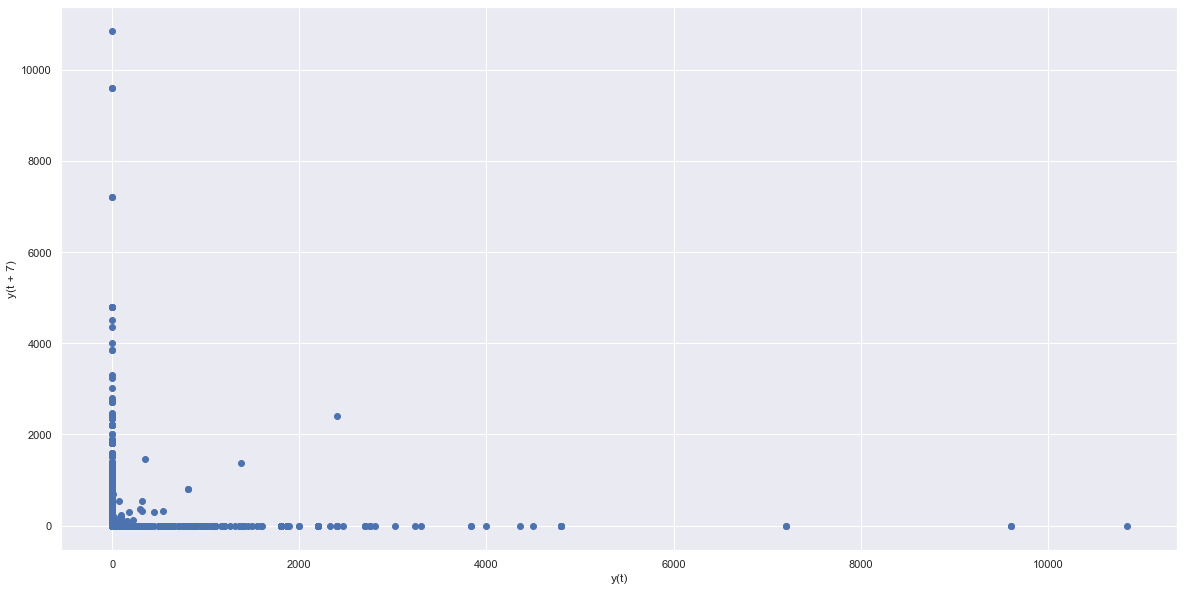

In [22]:
pd.plotting.lag_plot(df['ORDER_QUANTITY'], lag = 7)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


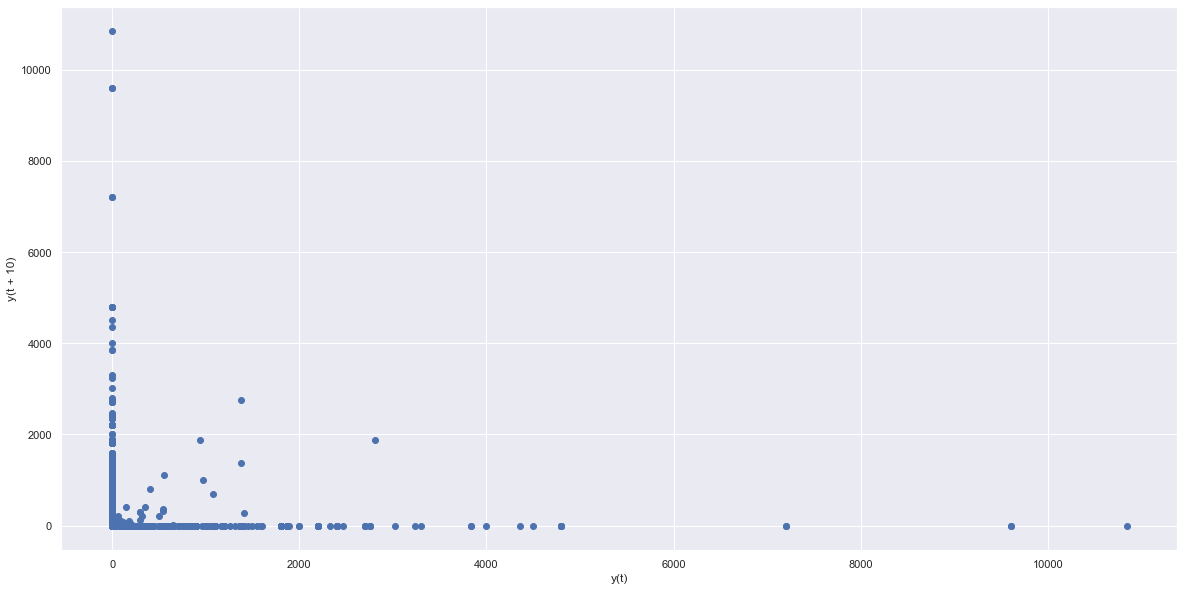

In [23]:
pd.plotting.lag_plot(df['ORDER_QUANTITY'], lag = 10)

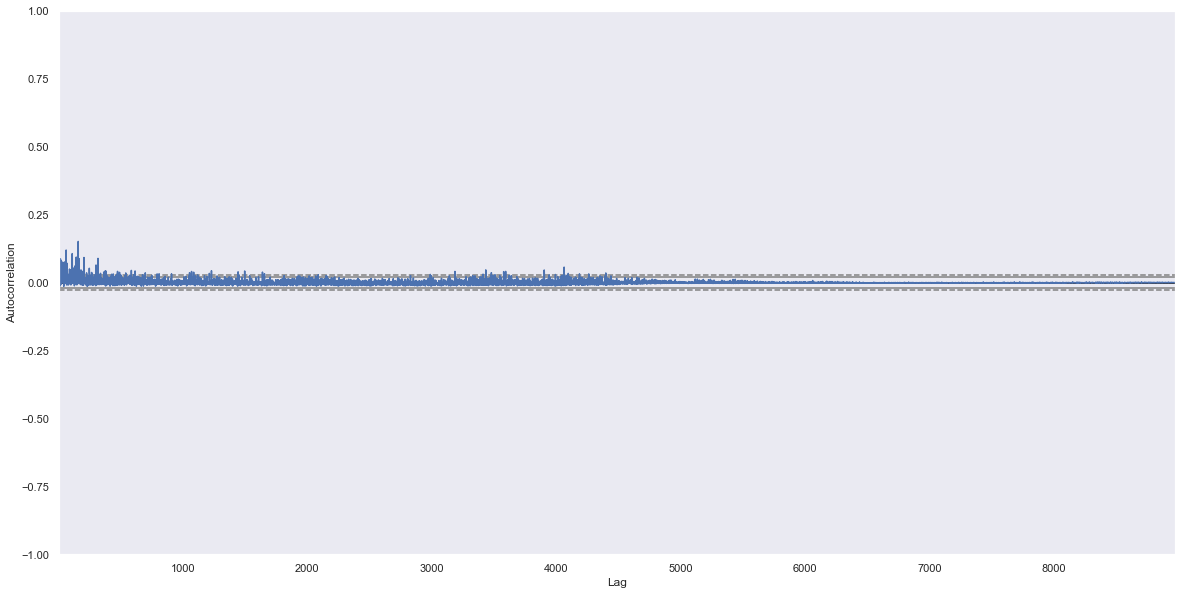

In [24]:
pd.plotting.autocorrelation_plot(df['ORDER_QUANTITY'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


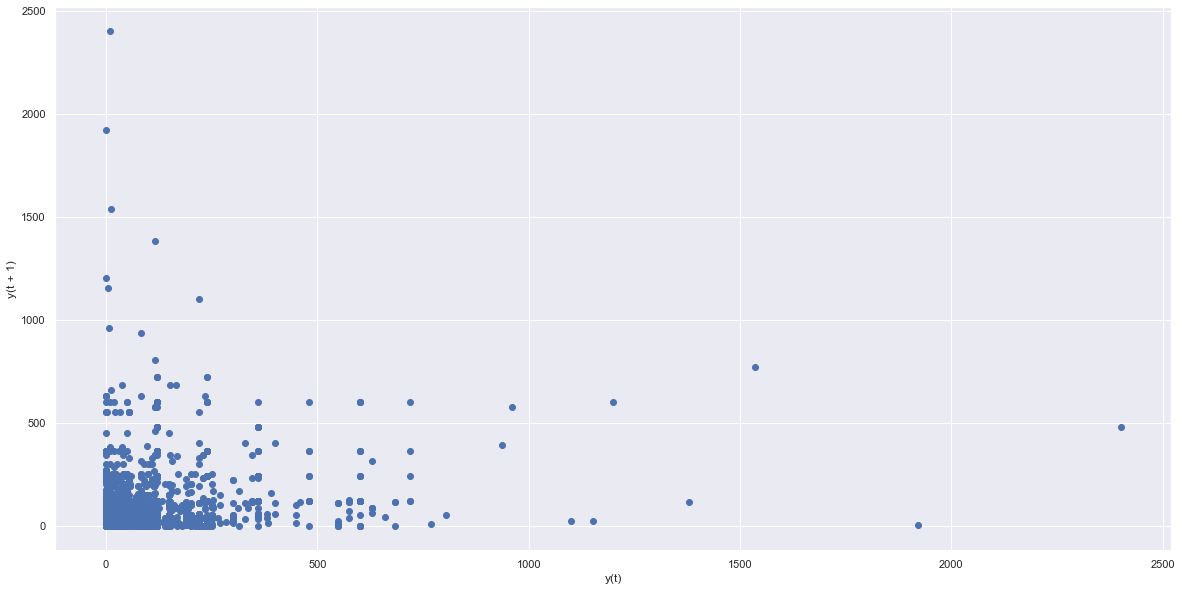

In [25]:
pd.plotting.lag_plot(df['SOLD_QUANTITY'], lag = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


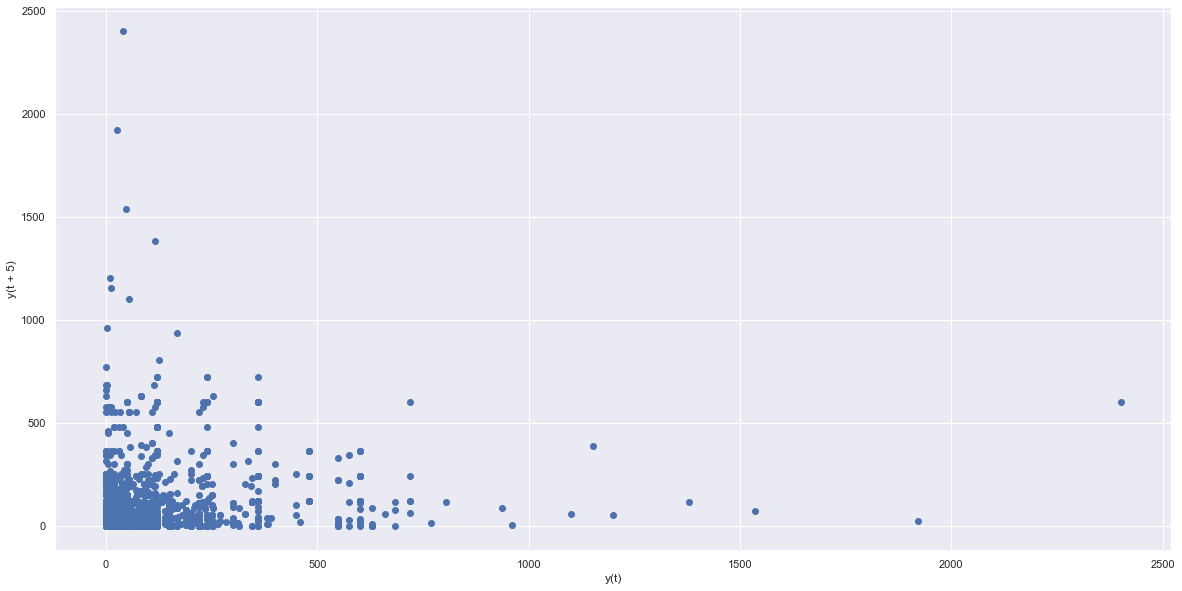

In [26]:
pd.plotting.lag_plot(df['SOLD_QUANTITY'], lag = 5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


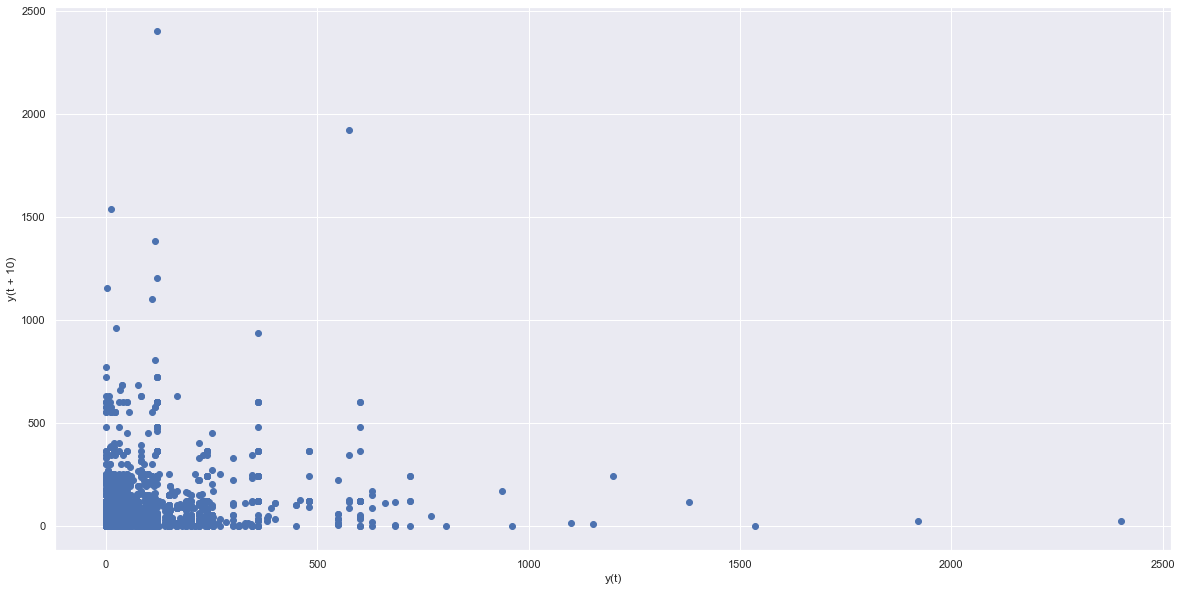

In [27]:
pd.plotting.lag_plot(df['SOLD_QUANTITY'], lag = 10)

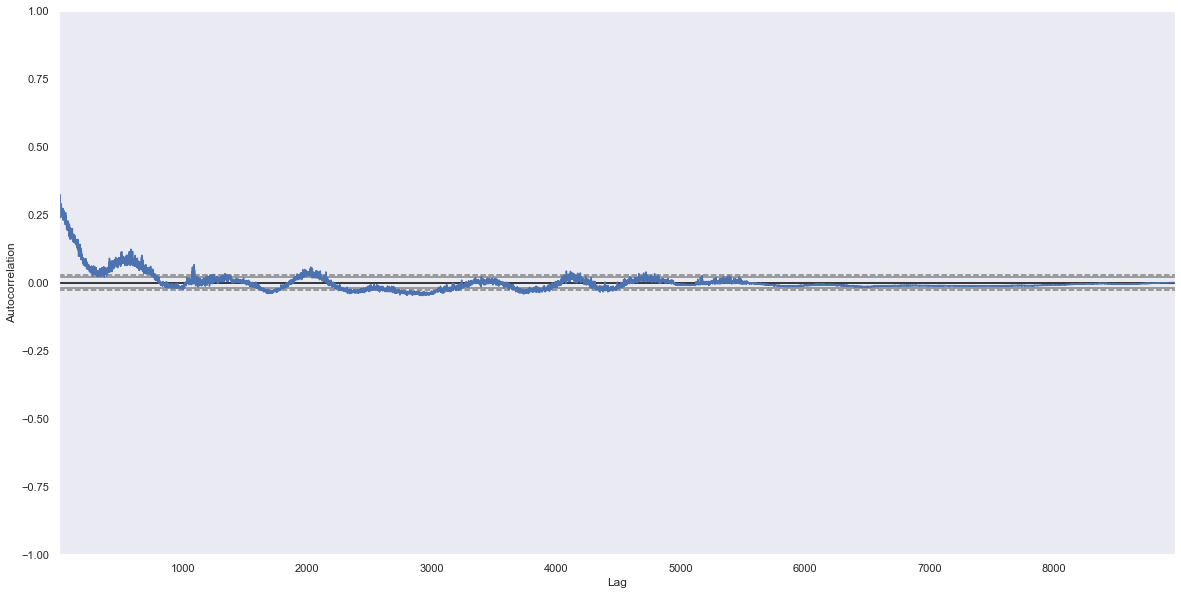

In [28]:
pd.plotting.autocorrelation_plot(df['SOLD_QUANTITY'])

In [29]:
df = df.set_index('DATE')
df.head()

,ME_ID,DISEASE_ID,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE,MEDICINE_NAME,DISEASE_NAME,CITY,year,month,day,weekday
DATE,,,,,,,,,,,,,
2019-04-01,AM2020,BL2020,1076.0,0,0.0,0.0,AMLOKIND AT -TAB,BLOOD PRESSURE,VIJAYAWADA,2019,4,1,0
2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1
2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2019,5,21,1
2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,ONGOLE,2019,5,21,1
2019-05-21,AM2020,BL2020,0.0,0,22.0,2.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1


##### Simple moving average--calculate for last n data points

In [30]:
df2 = df[['SOLD_QUANTITY']]
df2['SOLD_QUANTITY'].rolling(window = 8).mean()
df2['sma'] = df['SOLD_QUANTITY'].rolling(window = 8).mean().shift(1) #shifting 1 time stamt
df2.head(15)

<ipython-input-30-f153767523f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sma'] = df['SOLD_QUANTITY'].rolling(window = 8).mean().shift(1) #shifting 1 time stamt


,SOLD_QUANTITY,sma
DATE,,
2019-04-01,0.0,NaN
2019-05-21,110.0,NaN
2019-05-21,110.0,NaN
2019-05-21,110.0,NaN
2019-05-21,22.0,NaN
2019-05-22,110.0,NaN
2019-05-22,220.0,NaN
2019-05-23,55.0,NaN
2019-05-24,22.0,92.125


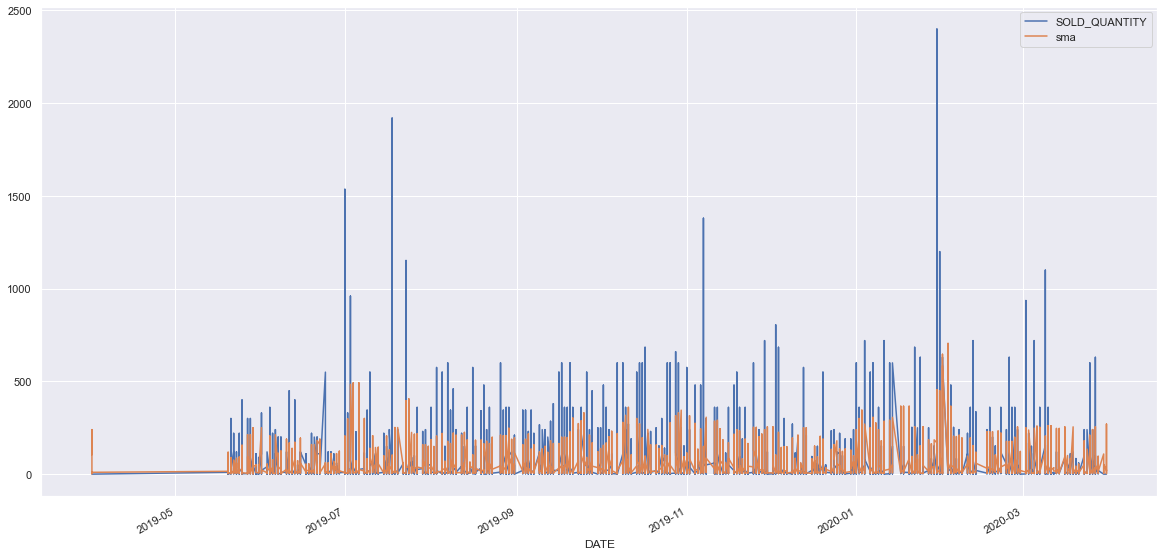

In [31]:
df2[['SOLD_QUANTITY', 'sma']].plot()

##### Weighted moving average-- asign weights to the moving averages

In [32]:
def wma(weights):
    def calc(x):
        return( weights*x).mean()
    return calc

In [33]:
df2['SOLD_QUANTITY'].rolling(window = 3).apply(wma(np.array([0.5, 1, 1.5])))
df2['wma'] = df2['SOLD_QUANTITY'].rolling(window = 3).apply(wma(np.array([0.5, 1, 1.5]))).shift(1)
df2.head(15)

<ipython-input-33-a6c4408a7f78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['wma'] = df2['SOLD_QUANTITY'].rolling(window = 3).apply(wma(np.array([0.5, 1, 1.5]))).shift(1)


,SOLD_QUANTITY,sma,wma
DATE,,,
2019-04-01,0.0,NaN,NaN
2019-05-21,110.0,NaN,NaN
2019-05-21,110.0,NaN,NaN
2019-05-21,110.0,NaN,91.666667
2019-05-21,22.0,NaN,110.000000
2019-05-22,110.0,NaN,66.000000
2019-05-22,220.0,NaN,80.666667
2019-05-23,55.0,NaN,150.333333
2019-05-24,22.0,92.125,119.166667


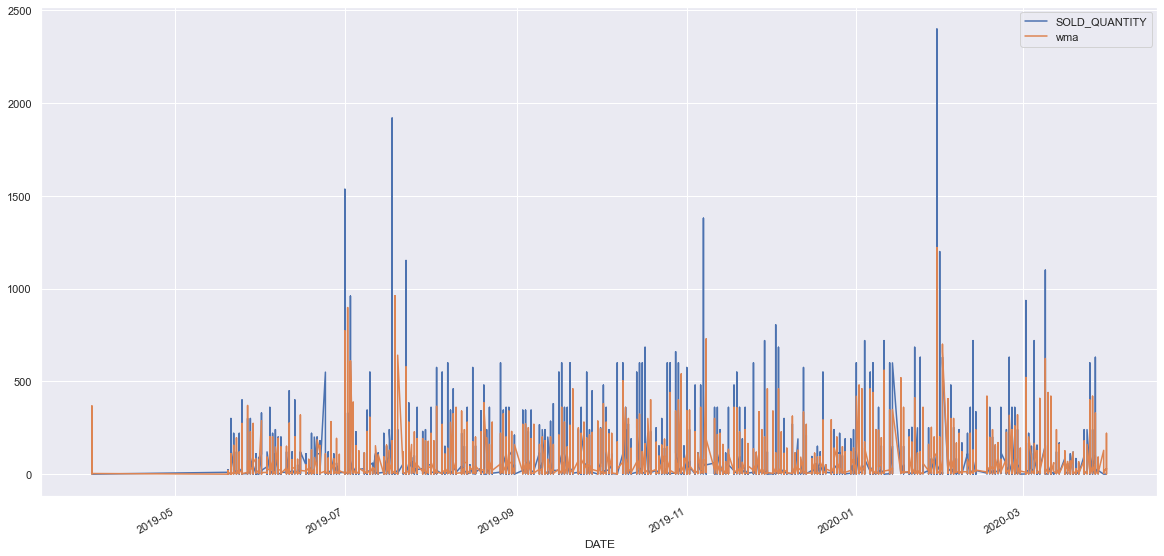

In [34]:
df2[['SOLD_QUANTITY', 'wma']].plot()

##### Exponential moving average--adopts more quickly to your data points

In [35]:
df2['SOLD_QUANTITY'].ewm(span = 7, adjust = False, min_periods = 0).mean() # span represnts no of days
df2['ema'] = df2['SOLD_QUANTITY'].ewm(span = 7, adjust = False, min_periods = 0).mean().shift(1)
df2.head(15)

<ipython-input-35-b99d4f6385d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ema'] = df2['SOLD_QUANTITY'].ewm(span = 7, adjust = False, min_periods = 0).mean().shift(1)


,SOLD_QUANTITY,sma,wma,ema
DATE,,,,
2019-04-01,0.0,NaN,NaN,NaN
2019-05-21,110.0,NaN,NaN,0.000000
2019-05-21,110.0,NaN,NaN,27.500000
2019-05-21,110.0,NaN,91.666667,48.125000
2019-05-21,22.0,NaN,110.000000,63.593750
2019-05-22,110.0,NaN,66.000000,53.195312
2019-05-22,220.0,NaN,80.666667,67.396484
2019-05-23,55.0,NaN,150.333333,105.547363
2019-05-24,22.0,92.125,119.166667,92.910522


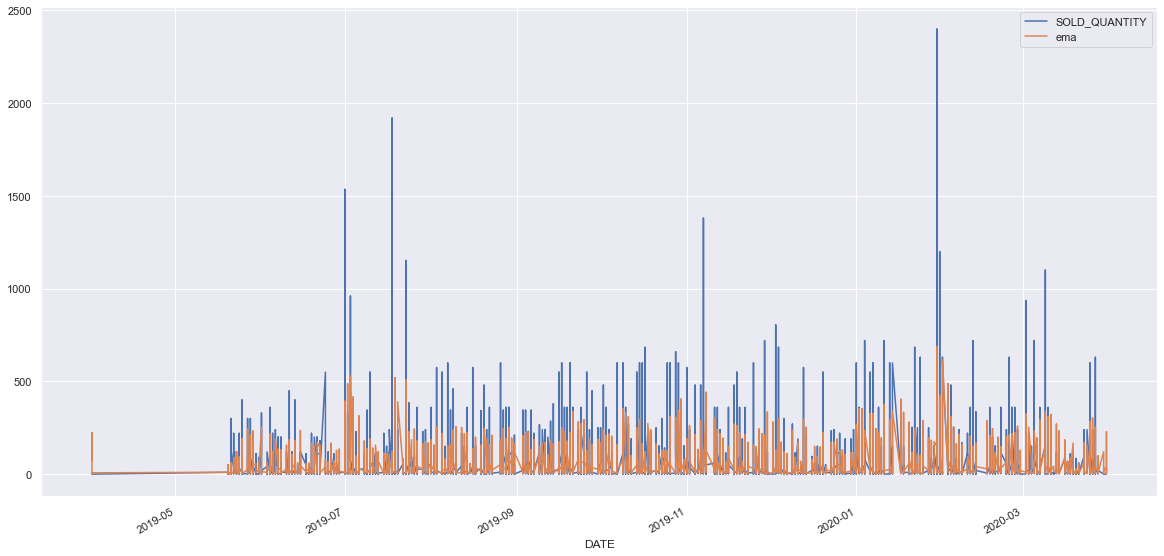

In [36]:
df2[['SOLD_QUANTITY', 'ema']].plot()

##### exponential smoothing

In [37]:
df2['SOLD_QUANTITY'].ewm(alpha = 0.1, adjust = False, min_periods = 0).mean() # span represnts no of days
df2['es'] = df2['SOLD_QUANTITY'].ewm(alpha = 0.1, adjust = False, min_periods = 0).mean().shift(1)
df2.head(15)

<ipython-input-37-e44101cca580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['es'] = df2['SOLD_QUANTITY'].ewm(alpha = 0.1, adjust = False, min_periods = 0).mean().shift(1)


,SOLD_QUANTITY,sma,wma,ema,es
DATE,,,,,
2019-04-01,0.0,NaN,NaN,NaN,NaN
2019-05-21,110.0,NaN,NaN,0.000000,0.000000
2019-05-21,110.0,NaN,NaN,27.500000,11.000000
2019-05-21,110.0,NaN,91.666667,48.125000,20.900000
2019-05-21,22.0,NaN,110.000000,63.593750,29.810000
2019-05-22,110.0,NaN,66.000000,53.195312,29.029000
2019-05-22,220.0,NaN,80.666667,67.396484,37.126100
2019-05-23,55.0,NaN,150.333333,105.547363,55.413490
2019-05-24,22.0,92.125,119.166667,92.910522,55.372141


### RMSE score

In [38]:
((df2['SOLD_QUANTITY'] - df2['sma'])**2).mean()**0.5

76.2255593218109

In [39]:
((df2['SOLD_QUANTITY'] - df2['wma'])**2).mean()**0.5

83.88728589594851

In [40]:
((df2['SOLD_QUANTITY'] - df2['ema'])**2).mean()**0.5 # increasing span may be not be good, since we order every wekk.

76.3836111437299

In [41]:
((df2['SOLD_QUANTITY'] - df2['es'])**2).mean()**0.5

73.89289773216267

#### kpss test

In [42]:
#null hypothesis - series is sationary
#alternate hypothesis -- series is not stationary

from statsmodels.tsa.stattools import kpss
# c if data is stationary around a constant
# ct if data is stationary around a trend
stats, p, lags, critical_values = kpss(df2['SOLD_QUANTITY'], 'c')

print(f'test statistics: {stats}')
print(f'p-value: {p}')
print(f'critica values: {critical_values}')

if p< 0.05:
    print ('Series is not stationary')
else:
    print ('Series is stationary')

test statistics: 3.2275804236851333
p-value: 0.01
critica values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


#### adf test

In [43]:
#null hypothesis -- series is not sationary
#alternate hypothesis -- series is stationary

from statsmodels.tsa.stattools import adfuller
result=adfuller(df['SOLD_QUANTITY'])

print(f'test statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critica values: {result[4]}')

if result[1] < 0.05:
    print ('Series is not stationary')
else:
    print ('Series is stationary')

test statistics: -5.186358758000529
p-value: 9.37374124927215e-06
critica values: {'1%': -3.4310820030733957, '5%': -2.861863497573323, '10%': -2.566942192742442}
Series is not stationary


#### model training 

In [78]:
import pmdarima as pm

model = pm.auto_arima(df2['SOLD_QUANTITY'], m=1, seasonal=False,
                      start_p=0, start_q=0, max_order=1, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=106864.310, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=104968.035, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=105600.870, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=104401.190, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=103805.254, Time=0.32 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=103420.779, Time=0.35 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=103280.969, Time=0.44 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=102532.640, Time=4.30 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=102538.644, Time=5.82 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=102542.075, Time=8.08 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=102548.956, Time=5.79 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=102525.577, Time=17.55 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=102536.298, Time=15.45 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=103113.777, Time=1.12 sec
 AR

In [69]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df2['SOLD_QUANTITY'],order=(1, 1, 2))
results=model.fit()
df2['forecast']=results.predict()

from sklearn. metrics import mean_squared_error
sqr_error = mean_squared_error(df2.SOLD_QUANTITY, df2.forecast)
np.sqrt(sqr_error)

73.39895140575845

In [79]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df2['SOLD_QUANTITY'],order=(5, 0, 1))
results=model.fit()
df2['forecast']=results.predict()

from sklearn. metrics import mean_squared_error
sqr_error = mean_squared_error(df2.SOLD_QUANTITY, df2.forecast)
np.sqrt(sqr_error)

73.27222754671365

In [80]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df2['SOLD_QUANTITY'],order=(1, 0, 1))
results=model.fit()
df2['forecast']=results.predict()

from sklearn. metrics import mean_squared_error
sqr_error = mean_squared_error(df2.SOLD_QUANTITY, df2.forecast)
np.sqrt(sqr_error)

73.4732045064786

In [81]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df2['SOLD_QUANTITY'],order=(27, 1, 1))
results=model.fit()
df2['forecast']=results.predict()

from sklearn. metrics import mean_squared_error
sqr_error = mean_squared_error(df2.SOLD_QUANTITY, df2.forecast)
np.sqrt(sqr_error)

72.46744419967166

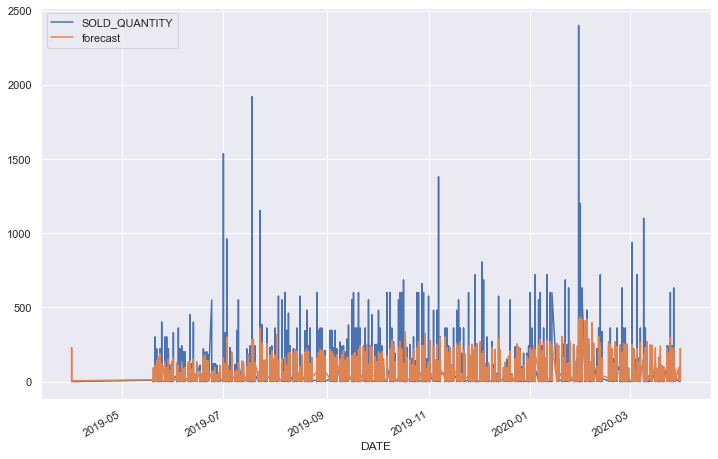

In [84]:
df2[['SOLD_QUANTITY','forecast']].plot(figsize=(12,8))